# <font face = 'Palatino Linotype' color = '#EE6D50'> Python Qdesc Jutsu <font/>
## <font face = 'Palatino Linotype' color = '#7A003D'> Author and Trainer: Paolo G. Hilado MSc. (Data Science) <font/>
### The Data Ninja's Guide to Swift Descriptive Analysis
For aspiring data analysts who want to move fast, see everything, slice through data sets, and perform the appropriate analysis aimed to address every research / business problem. The way to do things is to produce better results with higher efficiency.

### Loading the Data Set
Be aware of the file type. Check out the file extension whether .csv or .xlsx and apply the appropriate pandas function accordingly to import the file.

In [1]:
# Import the necessary libraries
import pandas as pd
import qdesc as qd

In [23]:
# Import the "Employee Satisfaction.xlsx" data set.
df =  pd.read_excel("SleepData.xlsx")

In [24]:
# Show the data set content
# Useful tip: we can always check it out to only limit "x" number of rows.
# In this demonstration, I will limit it to 3 rows
df.head(3)
# You can see only 3 rows because we indicated it on the code. IT DOESN'T MEAN that variable "df" only has 3 rows.
# Instead, df has all the rows that the file has (you can check it out by calling df) but it only shows 3 rows.

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
1,Female,58,Married,Permanent,8.76
2,Female,60,Single,Permanent,8.49


In [25]:
# Now let us do quick descriptive statistics on the dataframe df and save it on variable "results".
results = qd.desc(df)

In [26]:
# We now call on the variable "results" to see what it contains.
results
# As you can see, all these useful statistics at our fingertips with just one line of code. 

,count,mean,std,median,MAD_raw,MAD_norm,min,max,AD_stat,pvalue
Age,671.0,49.80,19.36,49.00,17.00,25.20,18.00,84.00,7.38,0.01
sleep(hrs)/weeknights,671.0,7.63,1.39,8.34,0.98,1.45,4.52,9.88,35.70,0.01


In [27]:
# Next is to generate descriptive statistics when the participants are GROUPED BY SEX.
# Let us try have the descriptives for salary among males and females.
# This can also be easily done in qdesc.
resultsex = qd.grp_desc(df, "sleep(hrs)/weeknights", "Sex")

In [28]:
# Now let us call on the variable "resultsex" to view the results.
# That is fairly quick. Saves you time as compared to doing this in spreadsheet!
resultsex

,Sex,count,mean,std,median,mad_raw,mad_norm,min,max,AD_stat,pvalue
0,Female,350,7.67,1.36,8.33,0.96,1.42,4.52,9.88,17.14,0.01
1,Male,321,7.57,1.43,8.36,0.99,1.47,4.66,9.64,18.70,0.01



--- Variable: Age ---
  Anderson-Darling Statistic : 7.3813
  p-value : 0.0100
  Decision : Reject Null


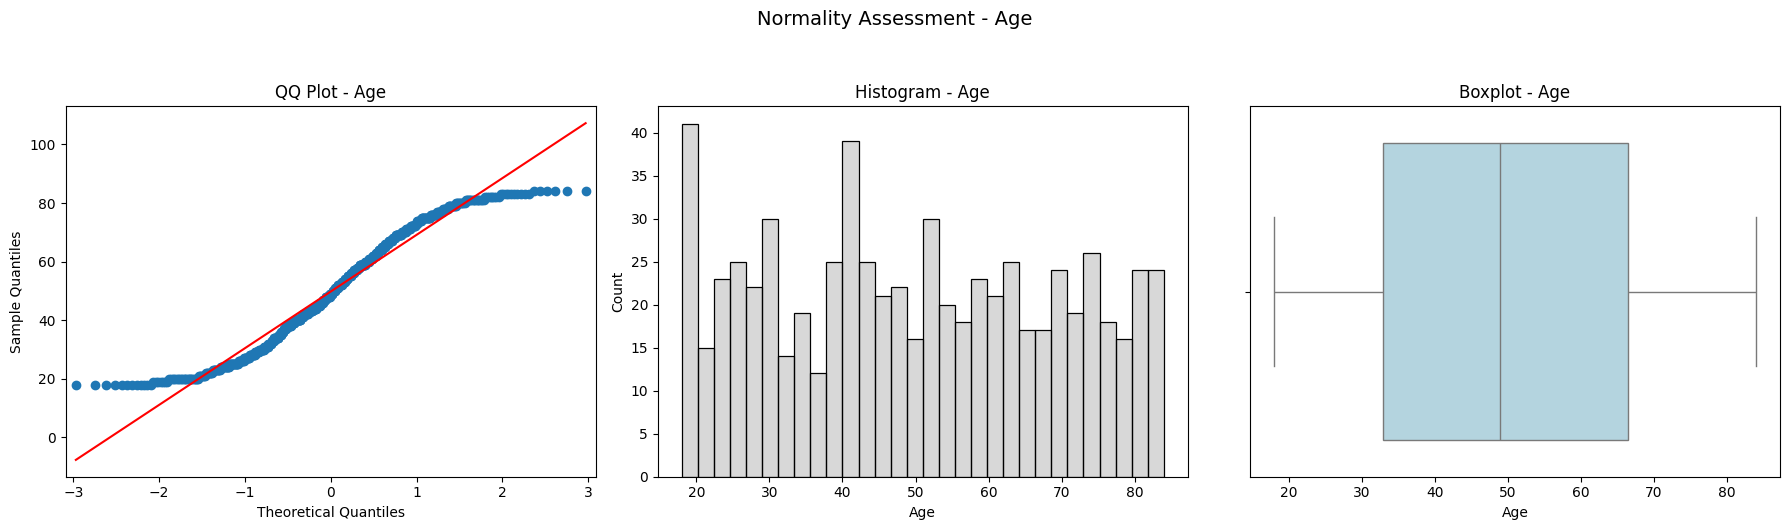


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 35.6977
  p-value : 0.0100
  Decision : Reject Null


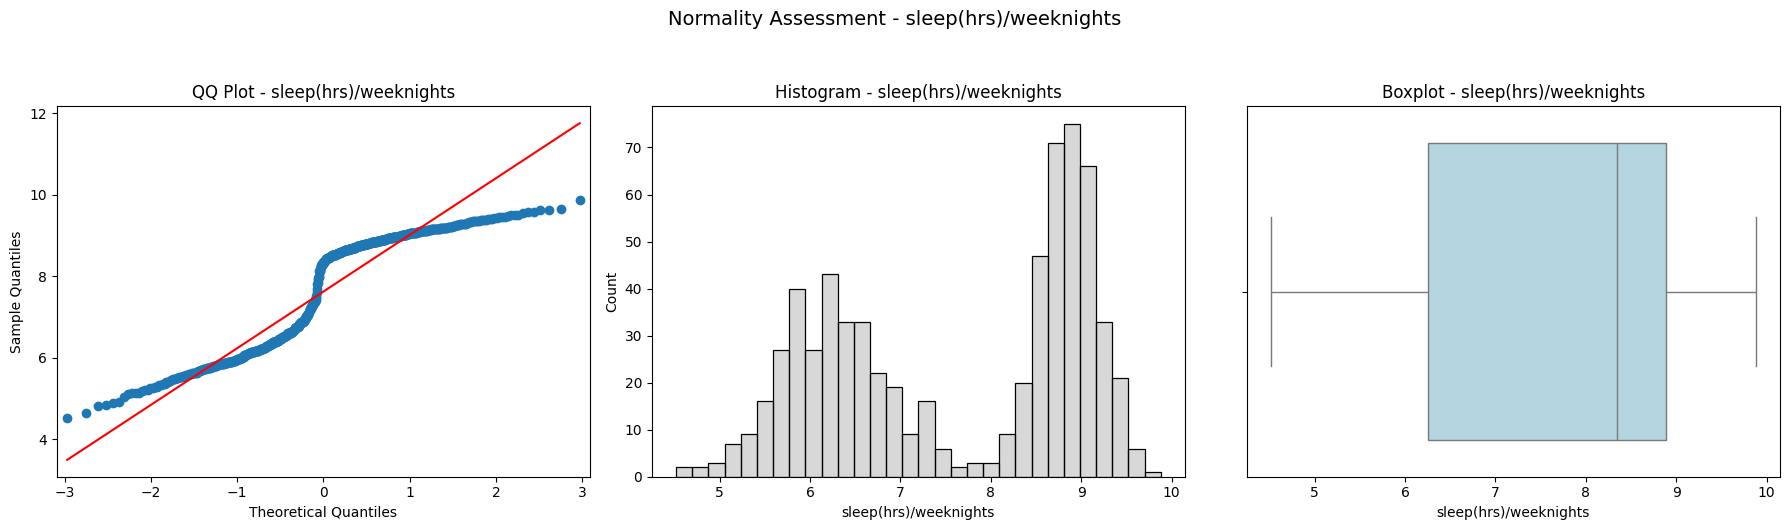

In [29]:
# Mean or Median? Choosing the right measure of central tendency and spread is key to 
# meaningful interpretation of statistics. Now we do a normality testing to check this one.
# Can you just imagine that? Three continuous variables instantly have a normality check in < 5 seconds.
# This is definitely the ninja way to do analytics!
# Now how do you interpret this thing?
# Check the p-value. If it is <= 0.05 then the distribution is NOT NORMAL.
# If it is > 0.05 then the distribution is NORMAL
# Now you already known what is the best measure of central tendency and spread for NORMAL or NOT NORMAL. Apply them!
qd.normcheck_dashboard(df)

In [30]:
# Lastly, we export the results to a spreadsheet.
# Recall that you save the descriptive analytics results to the variable "results" earlier. So we will use that.
# Keep in mind the need to be consistent for the function and file extension.
# For to_excel then the file extension is .xlsx.
# For to_csv then the file extension is .csv
results.to_excel("Descriptive Results.xlsx")

In [32]:
df["Sex"] = df["Sex"].astype("category")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Sex                    671 non-null    category
 1   Age                    671 non-null    int64   
 2   MaritalStatus          671 non-null    str     
 3   Employment             671 non-null    str     
 4   sleep(hrs)/weeknights  671 non-null    float64 
dtypes: category(1), float64(1), int64(1), str(2)
memory usage: 32.9 KB


In [42]:
freqdist = qd.freqdist(df, "Sex")
freqdist

,Sex,Count,Percentage
0,Female,350,52.16
1,Male,321,47.84


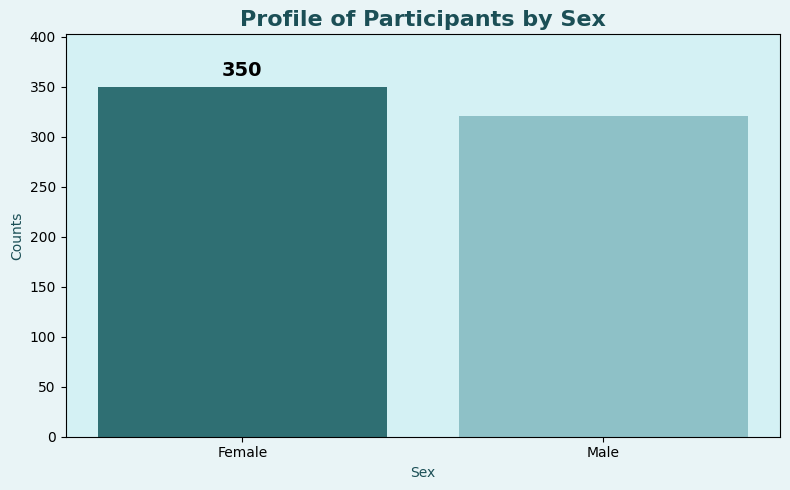

In [43]:
qd.purvis_col(freqdist, 
            "Sex", 
            "Count", 
            title = "Profile of Participants by Sex",
            xlabel = "Sex",
            ylabel = "Counts")

In [57]:
df = pd.DataFrame({
    'Category': ['Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf'],
    'Value':    [34,78,22,91,45,62,55]
})

df # say df is a result of the freqdist function for qdesc and you want to use the bar chart given that there are many categories

,Category,Value
0,Alpha,34
1,Bravo,78
2,Charlie,22
3,Delta,91
4,Echo,45
5,Foxtrot,62
6,Golf,55


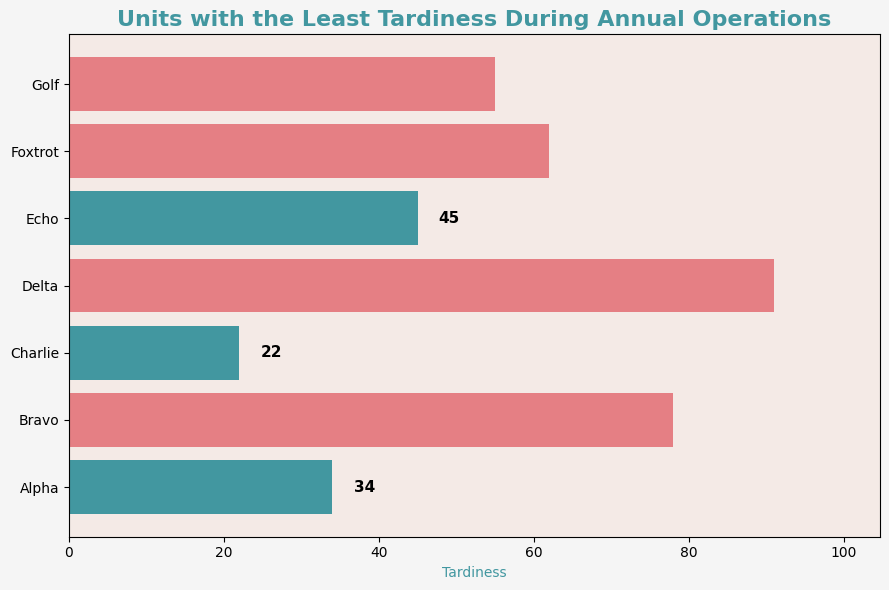

In [58]:
qd.purvis_bar(df,
           title = "Units with the Least Tardiness During Annual Operations", 
           category_col = "Category",
           value_col = "Value",
           xlabel= "Tardiness", 
           top_n = 3, # adjust the number of highlighted columns
           mode = "bottom", # can be adjusted to top or bottom
           palette = "spritz") # change color palette based on your preference. listing available at qdesc pypi documentation

In [59]:
# Sample data
df = pd.DataFrame({
    'Period': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales': [150, 200, 180, 220, 300, 280, 350, 400]
})

df # say df is a time series data that you have for analysis

,Period,Sales
0,Jan,150
1,Feb,200
2,Mar,180
3,Apr,220
4,May,300
5,Jun,280
6,Jul,350
7,Aug,400


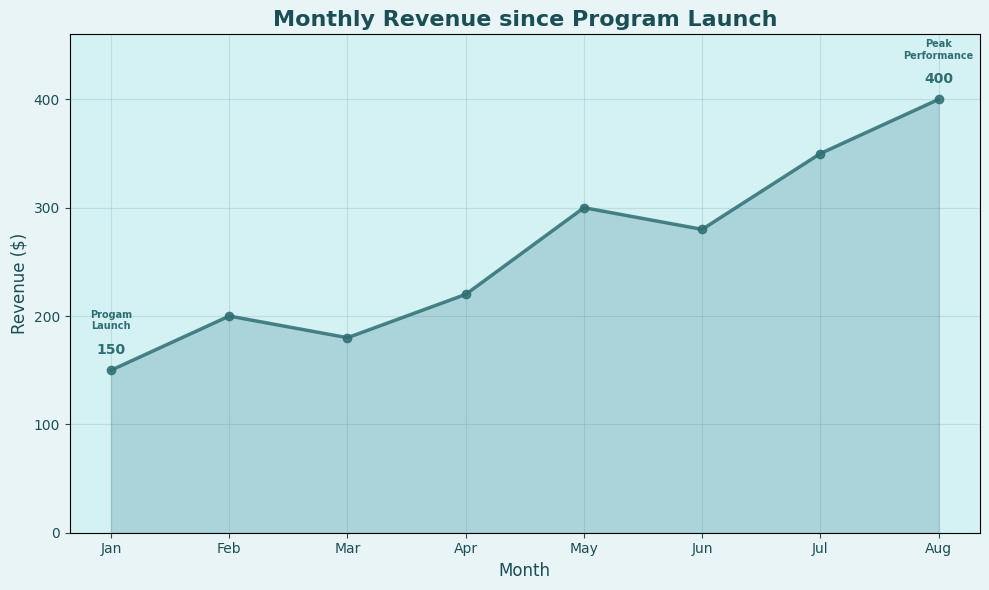

In [60]:
# Indicate the annotations on the line chart that you wish to have
annotations_list = [
    {"x": "Aug", "text": "Peak Performance"},
    {"x": "Jan", "text": "Progam Launch"}
]

qd.purvis_line(
    df,
    x_col="Period",
    y_col="Sales",
    title="Monthly Revenue since Program Launch",
    xlabel="Month",
    ylabel="Revenue ($)",
    palette="teal", # change color palette based on your preference. listing available at qdesc pypi documentation
    mode="both", # can be top, bottom, or both
    top_n= 1, # adjust the number of highlighted columns
    marker_shape='o', # can be 'o' for circle, 's' for square, 'D' for diamond, '^' for triangle pointing upwards, and 'v' for triangle pointing downwards
    line_width=2.5,
    light_grid= True, # prefer to have a light grid or not
    annotations = annotations_list
)